# Netoga poravnava slik

## Medicinski kontekst: diagnostika in spremljanje raka dojke

Poravnava medicinskih slik se uporablja v številnih kliničnih aplikacijah in poskusih, lahko pa tudi kot orodje za razgradnjo slik in modeliranje oblike. Na primer, poravnava slik različnih oseb oz. bolnikov omogoča karakterizacijo razlik v anatomski in funkcionalni informaciji in vrednotenje razlik glede na referenčno informacijo v obliki atlasa. Poravnava slik istega bolnika se uporablja za zlivanje informacije med komplementarnimi slikovnimi tehnikami z namenom izboljšane diagnostike in spremljanja ali načrtovanja zdravljenja. Primer zelo razširjenega longitudinalnega spremljanja za potencialna rakava obolenja je slikanje dojke z magnetno resonanco (MR; ang. *Magnetic Resonance*), ki se pri bolnicah s povečanim tveganjem za nastanek in agresivnejši razvoj te bolezni opravlja enkrat letno. Z uporabo intravenozno vbrizganega kontrastnega sredstva se poudari žilje in patološke strukture vpete na žilje, kot je tumor. Ojačene strukture lahko z uporabo poravnave še poudarimo z odštevanjem slike brez in s kontrastom ([Slika 1](#slika1)).

<a id='slika1'></a>
### Slika 1: Diagnostika in spremljanje raka dojke z MR

<table style="width:100%" bgcolor="#FFFFFF" align="center">
  <tr>
    <th>    
     <img src="images/AMS_2_SLO_PreCEMammo.png" alt="MR dojke brez kontrasta" style="float;left;width: 250px;"/>
    </th>
    <th>
    <img src="images/AMS_2_SLO_PreCEMammoMisaligned.png" alt="Razlika slik brez in s kontrastom" style="float;left;width: 250px;"/>
    </th>
    <th>
    <img src="images/AMS_2_SLO_MammoDiff-Misaligned.png" alt="Razlika po netogi poravnavi" style="float;left;width: 250px;"/>
    </th> 
  </tr>
  <tr>
      <td style="text-align:center">MR dojke brez kontrasta</td>
      <td style="text-align:center">MR dojke po kontrastu</td>
      <td style="text-align:center">Razlika slik brez in s kontrastom</td>
  </tr>
  <tr>
    <th>        
    </th>
    <th>
    <img src="images/AMS_2_SLO_PreCEMammo-Aligned.png" alt="Razlika slik brez in s kontrastom" style="float;left;width: 250px;"/>
    </th>
    <th>
    <img src="images/AMS_2_SLO_MammoDiff-Aligned.png" alt="Razlika po netogi poravnavi" style="float;left;width: 250px;"/>
    </th> 
  </tr>
  <tr>
      <td style="text-align:center"></td>
      <td style="text-align:center">MR dojke po kontrastu z netogo poravnavo</td>
      <td style="text-align:center">Razlika slik brez in s kontrastom</td>
  </tr>    
</table>

Diagnostika in spremljanje raka dojke z MR brez in s kontrastom (*zgoraj*). Z netogo poravnavo lahko prostorsko normaliziramo strukture za odštevno slikanje, ki poveča občutljivost tehnike na patološke spremembe v dojki (*spodaj*).


## Navodila

Prostorska poravnava anatomskih struktur, ki prestavljajo mehka tkiva, je običajno bolj zahtevna od poravnave togih oz. nedeformabilnih struktur kot so kosti. Zahtevnost zavisi predvsem od števila prostostnih stopenj modela preslikave, pri čemer za poravnavo slik kostnih struktur in možganov običajno zadostujeta toga, podobnostna ali afina preslikava (6, 7, 12 parametrov v 3D), za poravnavo slik jeter ali dojk pa je potrebno uporabiti kompleksnejše (nelinearne) modele preslikave, ki imajo lahko tudi več 100 parametrov. Takim postopkom zato pravimo **netoga poravnava** ali **nelinearna poravnava** slik. 

Netoga poravnava je proces iskanja optimalne geometrijske preslikave $ \mathcal{T}: \mathbb{R}^d \rightarrow \mathbb{R}^d; d \in \{2,3\}$, ki anatomske strukture v modelu oz. sliki $I_m$ nekega objekta preslika v tako lego, ki je *skladna* z lego anatomskih struktur v modelu oz. sliki $I_f$. Glavni izziv pri netogi poravnavi je izbira ustreznega modela preslikave $\mathcal{T}$, ki verno opisuje dejanske fizikalne deformacije opazovanih anatomskih struktur in ima čim manj prostih parametrov. Večje število prostih parametrov sicer omogoča opis bolj poljubne preslikave, vendar je pri tem lahko kritična slabost numerična nestabilnost postopka poravnave, z več parametri pa hitro narašča tudi računska zahtevnost. Pri vaji boste načrtali postopek netoge poravnave s splošnim in zelo popularnim modelom preslikave z B-zlepki in optimizacijo mere podobnosti $MP$ med premično sliko $I_m$ in referenčno sliko $I_f$.

### B-zlepki

B-zlepki omogočajo modeliranje poljubne deformacije (FFD; ang. *Free-Form Deformation*) v poljubno dimenzionalnih prostorih, pri čemer je deformacija določena na podlagi položaja mreže kontrolnih točk. S spreminjanjem položaja kontrolnih točk vplivamo na deformacijo, tako dobljena preslikava pa bo vedno gladka in zvezna. Deformacijo 2D slike z B-zlepki definiramo na področju slike $\Omega = \{\mathbf{p}=(x,y)\,|\,0 \leq x \leq X, 0 \leq y \leq Y\}$. Naj $\Psi$ označuje $n_x \times n_y$ mrežo kontrolnih točk $\psi_{i,j}$, ki ima pripadajoči razmak $\delta_x$ in $\delta_y$ v $x$ in $y$ osi slike ([Slika 2](#slika2)). Uporabili bomo univariatne B-zlepke, ki jih s tenzorskim produktom lahko hitro razširimo na poljubno število dimenzij. Za 2D slike preslikavo s kubičnimi B-zlepki zapišemo kot:
$\begin{equation}
	\mathcal{T}_{2D}(\mathbf{p}) = \sum_{l=0}^3 \sum_{m=0}^3 B_l(u)\, B_m(v) \, \psi_{i+l, j+m}
\end{equation}$
pri čemer so $i = \lfloor\frac{x}{\delta_x} \rfloor$, $j = \lfloor\frac{y}{\delta_y} \rfloor$, $u = \frac{x}{\delta_x} - i$, $v = \frac{y}{\delta_y} - j$ in kjer $B_l$ predstavlja $l$-to bazno funkcijo B-zlepka:
$\begin{align}
B_0&=(1-u)^3 / 6\\
B_1&=(3u^3 - 6u^2 + 4) / 6\\
B_2&=(-3u^3 + 3u^2 + 3u + 1) / 6\\
B_3&=u^3 / 6.
\end{align}	$
Z B-zlepki lahko načrtamo zelo učinkovito poravnavo slik tudi z velikim številom kontrolnih točk, kajti bazne funkcije vplivajo na preslikavo le v lokalni okolici kontrolne točke (področje $4\times 4$ kontrolnih točk za kubične B-zlepke) in zato spreminjanje lege točke $\psi_{i,j}$ vpliva le na preslikavo v ustrezni okolice te točke ([Slika 2](#slika2)). 

Na osnovi interpolacije lege kontrolnih točk B-zlepkov lahko izračunamo vektor premika v vsaki točki premične slike. Na ta način dobimo *vektorsko polje*, ki ima enake dimenzije kot premična slika. Tako vektorsko polje kodira premike koordinat slike in mu pravimo tudi **polje deformacij**. Da bo polje deformacij znotraj celotne slike mora, razen v primeru B-zlepkov ničtega reda, mreža kontrolnih točk segati izven slike. Za kubične B-zlepke in sliko velikosti $X \times Y$ mrežo določimo kot je prikazano na [Sliki 2](#slika2), pri čemer je $n_x = \lceil \frac{X}{\delta_x} \rceil + 3$ in $n_y = \lceil \frac{Y}{\delta_y} \rceil + 3$. V prikazanem primeru imamo 64 kontrolnih točk $\psi_{i,j}$ v 2D, kar pomeni 128 prostih parametrov preslikave.

<a id='slika2'></a>
### Slika 2: Nelinearna preslikava z B-zlepki

<img src="images/AMS_2_SLO_GridDeformations.png" alt="Nelinearna preslikava z B-zlepki" style="float;left;"/>

Nelinearna preslikava z B-zlepki, ki je določena glede na lego kontrolnih točk v $n_x \times n_y$ mreži.

### Netoga poravnava z B-zlepki

Prostorsko ujemanje med slikama lahko ovrednotimo z mero podobnosti $MP$; to je skalarna funkcija, ki zavzame optimum, ko se položaji korespondenčnih struktur v slikah $I_m$ in $I_f$ medsebojno prekrivajo. Mero podobnosti je potrebno smiselno izbrati tako, da je čim manj občutljiva na motilna slikovna neskladja in čim bolj občutljiva na dejanska geometrijska neskladja med slikama. Za poravnavo medicinskih slik se pogosto uporablja medsebojna informacija (MI; ang. *Mutual Information*).

Tekom poravnave nam izbrana optimizacijska metoda iterativno spreminja parametre $\psi_{i,j}$ geometrijske preslikave $\mathcal{T}(\mathbf{p}) = \mathcal{T}(\mathbf{p} | \psi_{i,j})$ tako, da naprimer maksimizira mero podobnosti:
$\begin{equation*}
  \psi_{i,j}^* = \mathrm{argmax}_{\psi_{i,j}} \, MP\Bigl( I_m\bigl(\mathcal{T}(\mathbf{p} | \psi_{i,j})\bigr), I_f(\mathbf{p}) \Bigr) \,,
\end{equation*}$
kjer so $\psi_{i,j}^*$ optimalni parametri preslikave $\mathcal{T}(\mathbf{p} | \psi_{i,j})$.

Učinkovite implementacije netoge poravnave z B-zlepki temeljijo na uporabi gradientnih optimizacijskih postopkov, saj je model preslikave z B-zlepki enostavno odvedljiv in ima lokalni vpliv na deformacije v sliki, to pa poenostavi izračun odvoda mere podobnosti. Za prikaz uporabe netoge poravnave z B-zlepki bomo uporabili implementacijo, ki je na voljo v Python knjižnici `SimpleITK`.



### Analiza polja deformacij

Netoga poravnava slik se precej uporablja za zaznavanje sprememb in gibanja med zaporednimi slikovnimi preiskavami. Z netogo poravnavo je možno tudi natančno kvantificirati oz. izmeriti te spremembe, naprimer tako, da izmerimo spremembo prostornine na področju zanimanja $\Omega_O$ točno določenega organa $O$. Lokalna sprememba prostornine v infinitezimalno majhni okolici slikovnega elementa je določena z determinanto lokalno ocenjene Jacobijeve matrike: 
$\begin{equation} 
	J =  \left[ 
	\begin{array}{cc}
		\partial T_x / \partial x & \partial T_x / \partial y \\
		\partial T_y / \partial x & \partial T_y / \partial y
	\end{array}  \right]\end{equation} $
Če za preslikavo uporabimo B-zlepke je izračun matrike $J$ še posebej enostaven. Prvi stolpec matrike $J$ lahko tako dobimo z odvajanjem preslikave: 
$\begin{equation} \frac{\partial}{\partial x} \mathcal{T}_{2D}(\mathbf{p}) = \frac{1}{\delta_x}\sum_{l=0}^3
\sum_{m=0}^3 \left(\frac{d}{du} B_l(u)\right)\, B_m(v) \, \psi_{i+l, j+m}\,,
\end{equation} $
podobno izračunamo $\frac{\partial}{\partial y} \mathcal{T}_{2D}(\mathbf{p})$ za drugi stolpec. Ker so bazne funkcije $B_l$ zvezne in zvezno odvedljive jih lahko z analitičnim odvajanjem ($\frac{d}{du} B_l(u)$) prilagodimo za izračun elementov matrike $J$. Na ta način v vsaki točki dobimo oceno matrike $J$, determinanta te matrike ($\mathrm{det}J$) pa kaže relativne spremembe prostornine posameznega slikovnega elementa kot
posledica poravnave slik ($>1$ raztezanje, $<1$ krčenje, 1 nespremenjeno). Ker je z uporabo B-zlepkov polje deformacij in njegov odvod določen za vsak slikovni element lahko ustvarimo kar sliko $\mathrm{det}J$, za področje zanimanja $\Omega_O \subset \Omega$ pa nato z integriranjem določimo relativno spremembo prostornine  $\nabla V_O = 100\% \cdot (\frac{1}{|\Omega_O|} \sum_{\Omega_O} \mathrm{det}J - 1)$. [Slika 3](#slika3) prikazuje polje deformacij in pripadajoče polje $\mathrm{det}J(\mathrm{p})$ za netogo poravnavo MR slik dojke iz [Slike 1](#slika1).

<a id='slika3'></a>
### Slika 3: Polje Jacobijeve determinante


<img src="images/AMS_2_SLO_JacobianDetMap.png" alt="Polje Jacobijeve determinante" style="float;left;width: 600px"/>
![]()

Primer polja deformacij za poravnavo para danih MR slik (*levo*) in pripadajoče polje determinante Jacobijeve matrike (*desno*), ki kaže relative spremembe prostornine posameznega slikovnega elementa kot posledica poravnave slik ($>1$ raztezanje, $<1$ krčenje).

## Naloge

**Gradivo** za vajo vsebuje dve 2D MR sliki dojke, `data/mr-nonenhanced.png` in `data/mr-enhanced.png`, prvo brez in drugo s kontrastnim sredstvom. Slike naložite z ukazom `Image.open()`, knjižnice `PIL.Image`, in pretvorite v `numpy.array` polje. Sliki sta sivinski v nepredznačenem 8-bitnem zapisu, korak vzorčenja pa je 1$\times1$ milimeter. [Slika 1](#slika1) prikazuje dani MR sliki. 

Predno začnete z reševanjem nalog poženite spodnji blok kode, ki naloži potrebne Python knjižnice in definira nekatere pomožne funkcije.

In [1]:
!pip install SimpleITK
!pip install scipy
import numpy as np
import SimpleITK as sitk
import scipy.ndimage as ni
import matplotlib.pyplot as plt
from scipy.interpolate import interpn

def normalizeImage(iImage, type='whitening'):
    if type=='whitening':
        oImage = (iImage - np.mean(iImage)) / np.std(iImage)
    elif type=='range':
        oImage = (iImage - np.min(iImage)) / (np.max(iImage) - np.min(iImage))
    return oImage

def getChessBoardImage(iImageSize, iArraySize=10, dtype='uint8'):
    dy = int(np.ceil(iImageSize[0] / iArraySize)) + 1
    dx = int(np.ceil(iImageSize[1] / iArraySize)) + 1

    A = [255 * np.ones(shape=(iArraySize, iArraySize)), 
         np.zeros(shape=(iArraySize, iArraySize))]
    board = np.array(np.vstack([np.hstack([A[(i + j) % 2] \
                                           for i in range(dx)]) \
                                for j in range(dy)]), dtype=dtype)
    return board[:iImageSize[0], :iImageSize[1]]

def swirlControlPoints(iCPx, iCPy, a=2.0, b=100.0):
    oCPx = np.array(iCPx)
    oCPy = np.array(iCPy)
    xc = np.mean(oCPx[1:-3,1:-3])
    yc = np.mean(oCPy[1:-3,1:-3])
    rx1 = oCPx[1:-3,1:-3] - xc
    ry1 = oCPy[1:-3,1:-3] - yc
    angle = a*np.exp(-(rx1*rx1+ry1*ry1)/(b*b))
    oCPx[1:-3,1:-3] = np.cos(angle)*rx1 + np.sin(angle)*ry1 + xc
    oCPy[1:-3,1:-3] = -np.sin(angle)*rx1 + np.cos(angle)*ry1 + xc
    return oCPx, oCPy

You should consider upgrading via the '/Users/adisskrijelj/Desktop/FE/Biomedicinska_Tehnika/Analiza medicinskih slik/Vaje/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/adisskrijelj/Desktop/FE/Biomedicinska_Tehnika/Analiza medicinskih slik/Vaje/venv/bin/python3 -m pip install --upgrade pip' command.


1. Napišite funkcije za izračun kubičnih B-zlepkov $B_0$, $B_1$, $B_2$ in $B_3$. Za nadaljnjo rabo funkcije organizirajte v obliki seznama tipa `tuple`.

In [5]:
def B0(u):
    return (1 - u)**3 / 6
def B1(u):
    return (3*u**3 - 6*u**2 + 4) / 6
def B2(u):
    return (-3*u**3 + 3*u**2 + 3*u + 1) / 6
def B3(u):
    return u**3 / 6
    

B = np.array([B0, B1, B2, B3])

Spodnji blok izriše vrednosti B-zlepkom na intervalu $[0, 1]$, s čimer lahko vizualno preverite pravilnost gornjih izrazov.

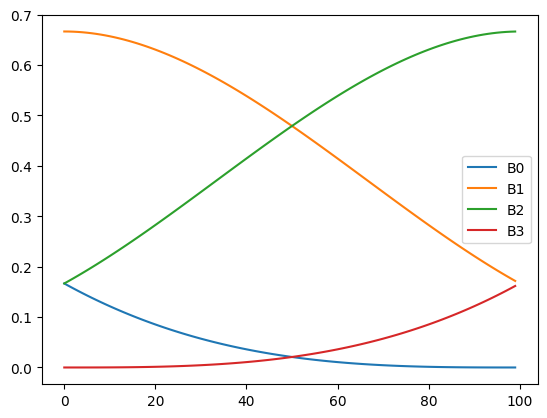

In [6]:
data = []
for x in np.arange(0, 1, 0.01):
    data.append([Bt(x) for Bt in B])
    
data = np.array(data)

plt.figure()
plt.plot(data)
plt.legend(['B0', 'B1', 'B2', 'B3'])
plt.show()

2. Napišite funkcijo, ki za dane dimenzije slike in korak vzorčenja ustvari 2D mrežo kontrolnih točk za 
kubične B-zlepke:
  ```python
  def getCubicBSpline2DGrid(iImageSize, iStep):
  return oCPx, oCPy
  ```
kjer je `iImageSize` vektor $1 \times 2$ in podaja dimenzije slike $X \times Y$, parameter `iStep` pa 
korak vzočenja $(\delta_x,\,\delta_y)$ mreže kontrolnih točk vzdolž $x$ in $y$ osi slike. Funkcija naj 
vrne dve polji kontrolnih točk za kubične B-zlepke `oCPx` in `oCPy` z dimenzijami $n_x \times n_y$, 
pri čemer sta $n_x = \lceil \frac{X}{\delta_x} \rceil + 3$ in $n_y = \lceil \frac{Y}{\delta_y} \rceil + 3$. 
Uporabite lahko ukaz `numpy.meshgrid()`, vendar poskrbite da bodo kubični B-zlepki določeni med vsako 
kontrolno točko v sliki, kar pomeni da morajo obstajati vzdolž vsake osi slike 4 kontrolne točke, od 
tega ena *levo/zgoraj* in dve *desno/spodaj* od najbližje kontrolne točke v sliki.

  Ustvarite sliko šahovnice z dimenzijami $(X \times Y) = (400 \times 400)$ in velikostjo polja v šahovnici 
$50 \times 50$ tako, da uporabite funkcijo `getCubicBSpline2DGrid(iImageSize, iStep)`, kjer je `iImageSize` 
vektor $1 \times 2$ in podaja dimenzije izhodne slike šahovnice, `iArraySize` pa spremenljivka, ki podaja 
dimezije posameznega polja v šahovnici. Nato ustvarite mrežo kontrolnih točk za sliko šahovnice in prikažite 
mrežo kontrolnih točk kot je prikazano na [Sliki 2](#slika2).


In [7]:
def getCubicBSpline2DGrid(iImageSize, iStep):
    dy, dx = iImageSize

    # Check if input is a scalar (list or tuple)
    if not isinstance(iStep, (list, tuple)):
        iStep = [iStep, iStep]

    # Create the grid (mreža kontrolnih točk, ki jih moraš dodati tudi izven slike)
    # dx je velikost slike, zato ga delimo s številom točk
    # od -50 do 550 s korakom 50
    oCPx, oCPy = np.meshgrid(
        np.arange(-iStep[0], (np.ceil(dx/iStep[0]) + 3)*iStep[0], iStep[0]),
        np.arange(-iStep[1], (np.ceil(dy/iStep[1]) + 3)*iStep[1], iStep[1]))
    
    return oCPx, oCPy

S spodnjim blokom preverite pravilnost določitve mreže kontrolnih točk.

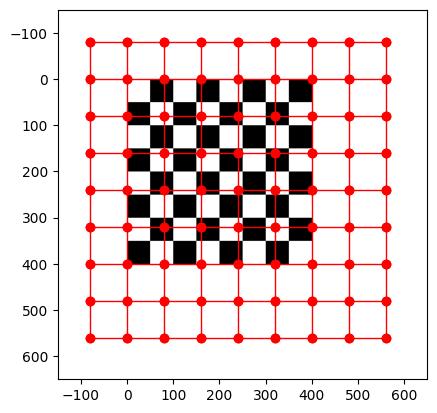

In [8]:
# določi velikost slike in velikost polja šahovnice
cbImage = getChessBoardImage((400,400), 50)

# določi korak vzorčenja kontrolnih točk
iStep = (80, 80)

# ustvari kontrolne točke
oCPx, oCPy = getCubicBSpline2DGrid(cbImage.shape, iStep)


# naredi izris
plt.close('all')
plt.figure()
plt.imshow(cbImage, cmap='gray')
plt.plot(oCPx, oCPy, marker='o', color='r', linewidth=1)
plt.plot(oCPx.transpose(), oCPy.transpose(), marker='o', color='r', 
         linewidth=1)
plt.xlim([-150,650])
plt.ylim([650,-150])
plt.show()

3. Napišite funkcijo, ki za dano 2D mrežo kontrolnih točk kubičnih B-zlepkov izračuna polje deformacij:
  ```python
  def getCubicBSpline2DDeformation(iImageSize, iCPx, iCPy, iStep):
        return oGx, oGy
  ```
kjer je `iImageSize` vektor $1 \times 2$ in podaja dimenzije slike $X \times Y$, `iCPx` in `iCPy` polji kontrolnih točk za kubične B-zlepke z enakimi dimenzijami $n_x \times n_y$, parameter `iStep` pa korak vzočenja $(\delta_x,\,\delta_y)$ originalne mreže kontrolnih točk vzdolž $x$ in $y$ osi slike. Funkcija naj vrne dve dvorazsežni polji `oGx` in `oGy`, ki imata dimenzije kot jih podaja vhodni parameter `iImageSize`.

  Preizkusite funkcijo tako, da translirate ($\pm 20 mm$) posamezne $x$ in $y$ koordinate kontrolnih točk $\psi_{i,j}$ in deformirate sliko šahovnice iz druge naloge.

In [9]:
def getCubicBSpline2DDeformation(iImageSize, iCPx, iCPy, iStep):
    dy, dx = iImageSize
    gx, gy = np.meshgrid(np.arange(dx), np.arange(dy))
    gx = np.array(gx, dtype='float64')
    gy = np.array(gy, dtype='float64')
    oGx = np.zeros_like(gx)
    oGy = np.zeros_like(gy)
    for l in (0, 1, 2, 3):
        for m in (0, 1, 2, 3):
            i = np.floor(gx / iStep[0])
            j = np.floor(gy / iStep[1])
            u = gx / iStep[0] - i
            v = gy / iStep[1] - j
            oGx += B[l](u) * B[m](v) * iCPx[
                    np.array(j, dtype='int64') + m, 
                    np.array(i, dtype='int64') + l]
            oGy += B[l](u) * B[m](v) * iCPy[
                    np.array(j, dtype='int64') + m, 
                    np.array(i, dtype='int64') + l]
    return oGx, oGy

S spodnjim blokom preverite pravilnost določitve polja deformacij.

Text(0.5, 1.0, 'Y komponenta premika')

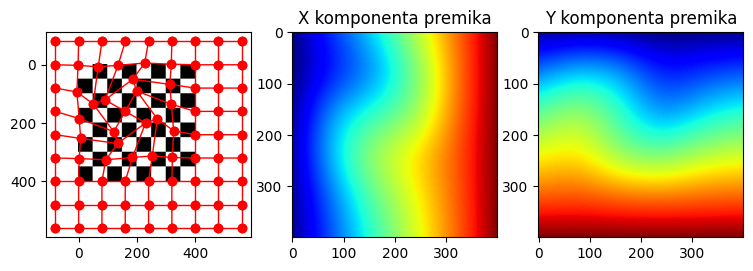

In [10]:
# premakni kontrolne točke glede na funkcijo vrtinca
oCPx_swirl, oCPy_swirl = swirlControlPoints(oCPx, oCPy, a=2.0, b=100.0)

# izračunaj polje deformacij
oGx, oGy = getCubicBSpline2DDeformation(
    cbImage.shape, oCPx_swirl, oCPy_swirl, iStep)

# naredi izris, tri osi v enem prikaznem oknu
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
ax1.imshow(cbImage, cmap='gray')
ax1.plot(oCPx_swirl, oCPy_swirl, marker='o', color='r', linewidth=1)
ax1.plot(oCPx_swirl.transpose(), oCPy_swirl.transpose(), marker='o', 
         color='r', linewidth=1)
ax2.imshow(oGx, cmap='jet')
ax2.set_title('X komponenta premika')
ax3.imshow(oGy, cmap='jet')
ax3.set_title('Y komponenta premika')

4. Napišite funkcijo, ki za dano 2D mrežo kontrolnih točk kubičnih B--zlepkov izračuna polje deformacij in prevzorči sliko:
  ```python 
  def deformImageBSpline2D(iImage, iCPx, iCPy, iStep):
	  return oImage
  ```
kjer je `iImage` sivinska 2D slika dimenzij $X \times Y$, `iCPx` in `iCPy` pripadajoči polji kontrolnih točk $\psi_{i,j}$ za kubične B-zlepke z dimenzijami $n_x \times n_y$, parameter `iStep` pa korak vzočenja $(\delta_x,\,\delta_y)$ originalne mreže kontrolnih točk vzdolž $x$ in $y$ osi slike. Funkcija naj izračuna polje deformacij $d(\mathbf{p}) = \mathcal{T}(\mathbf{p}|\psi_{i,j}) - \mathbf{p}$ s funkcijo `getCubicBSpline2DDeformation()` in določi nove vzorčne koordinate kot $\mathbf{p}' = \mathbf{p} - d(\mathbf{p})$. Z uporabo (bi)linearne interpolacije določite sivinske vrednosti v koordinatah $\mathbf{p}'$ na vhodni sliki `iImage`. Izhodna slika `oImage` ima enake dimenzije kot vhodna.

  Preizkusite funkcijo tako, da translirate ($\pm 20 mm$) posamezne $x$ in $y$ koordinate kontrolnih točk $\psi_{i,j}$ in deformirate sliko šahovnice iz druge naloge.

In [15]:
def deformImageBSpline2D(iImage, iCPx, iCPy, iStep):
    dy, dx = iImage.shape
    oGx, oGy = getCubicBSpline2DDeformation(iImage.shape, iCPx, iCPy, iStep)
    gx, gy = np.meshgrid(np.arange(dx), np.arange(dy))
    oGx = 2*gx - oGx
    oGy = 2*gy - oGy

    oImage = interpn((np.arange(dy), np.arange(dx)), iImage.astype('float64'),
                     np.dstack((oGy, oGx)), method='linear', bounds_error=False,
                     fill_value=0) # bounds error dopušča, da se točke izven slike interpolirajo
    return oImage

S spodnjim blokom preverite pravilnost prevzorčene slike glede na polje deformacij.

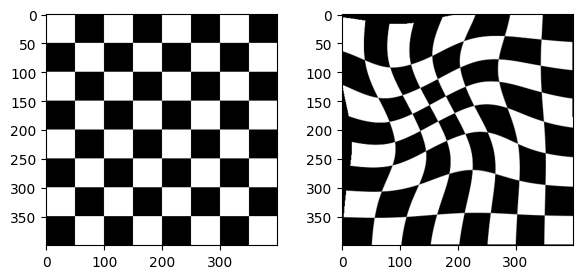

In [16]:
# prevzorči sliko glede na novo lego kontrolnih točk
cbImageDeformed = deformImageBSpline2D(
    cbImage, oCPx_swirl, oCPy_swirl, iStep)

# naredi izris, dvoje osi v enem prikaznem oknu
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
ax1.imshow(cbImage, cmap='gray')
ax2.imshow(cbImageDeformed, cmap='gray')
plt.show()

5. Z uporabo knjižnice `SimpleITK` preizkusite postopek poravnave z B-zlepki na danem paru MR slik. V spodnjem bloku je dan primer kode. Poženite kodo in analizirajte posamezne gradnike.

In [13]:
# nalozi slike
fixed = sitk.ReadImage('data/mr-nonenhanced.png', sitk.sitkFloat32)
moving = sitk.ReadImage('data/mr-enhanced.png', sitk.sitkFloat32)

# inicializacija postopka
R = sitk.ImageRegistrationMethod()

# inicializacija preslikave z B-zlepki
bsplineGrid = 8
bTr = sitk.BSplineTransformInitializer(fixed, [bsplineGrid] * 2)
R.SetInitialTransform(bTr, inPlace=True)

# inicializacija mere podobnosti
R.SetMetricAsMattesMutualInformation(32)
R.SetMetricSamplingPercentage(0.25)
R.SetMetricSamplingStrategy(R.RANDOM)

# inicializacija optimizacije
R.SetOptimizerAsGradientDescentLineSearch(
    learningRate=5.0,
    numberOfIterations=100,
    convergenceMinimumValue=1e-5,
    convergenceWindowSize=5)
R.SetOptimizerScalesFromPhysicalShift()

# zagon poravnave
outTx = R.Execute(fixed, moving)
print(outTx)
# ustvarjanje izhodne slike
S = sitk.ResampleImageFilter()
S.SetReferenceImage(fixed)
S.SetInterpolator(sitk.sitkLinear)
S.SetDefaultPixelValue(0)
S.SetTransform(outTx)
outImage = S.Execute(moving)

# shranjevanje izhodne slike
sitk.WriteImage(sitk.Cast(outImage, sitk.sitkUInt8),
    'mr-enhanced-registered.png', True)

itk::simple::BSplineTransform
 BSplineTransform (0x106dc4350)
   RTTI typeinfo:   itk::BSplineTransform<double, 2u, 3u>
   Reference Count: 3
   Modified Time: 106846
   Debug: Off
   Object Name: 
   Observers: 
     none
   CoefficientImage: [ 0x14494d5f0, 0x14494d7e0 ]
   TransformDomainOrigin: [-0.625, -0.625]
   TransformDomainPhysicalDimensions: [402.25, 407.25]
   TransformDomainDirection: 1 0
0 1

   TransformDomainMeshSize: [8, 8]
   GridSize: [11, 11]
   GridOrigin: [-50.9062, -51.5312]
   GridSpacing: [50.2812, 50.9062]
   GridDirection: 1 0
0 1




  Prikažite poravnano sliko in preverite ali je bila poravnava uspešna. Prikažite še odšteti sliki pred in po poravnavi tako, kot je prikazano na [Sliki 1](#slika1). Pred odštevanjem slik ustrezno medsebojno prilagodite sivinske vrednosti slik.

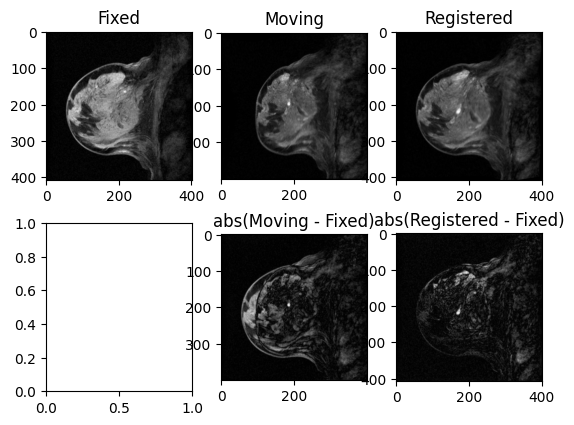

In [14]:
# prikaz slik pred in po poravnavi
fixed = sitk.ReadImage('data/mr-nonenhanced.png', sitk.sitkUInt8)
moving = sitk.ReadImage('data/mr-enhanced.png', sitk.sitkUInt8)
registered = sitk.ReadImage('mr-enhanced-registered.png', sitk.sitkUInt8)

fa = sitk.GetArrayFromImage(fixed)
ma = sitk.GetArrayFromImage(moving)
ra = sitk.GetArrayFromImage(registered)

# šest osi v enem prikaznem oknu
f, ax = plt.subplots(2, 3)
ax[0,0].imshow(fa, cmap='gray')
ax[0,0].set_title('Fixed')
ax[0,1].imshow(ma, cmap='gray')
ax[0,1].set_title('Moving')
ax[0,2].imshow(ra, cmap='gray')
ax[0,2].set_title('Registered')

fa = normalizeImage(fa.astype('float'))
ma = normalizeImage(ma.astype('float'))
ra = normalizeImage(ra.astype('float'))

dy, dx = np.min(np.array((fa.shape,ma.shape)),axis=0)
ax[1,1].imshow(np.abs(ma[:dy,:dx]-fa[:dy,:dx]), cmap='gray')
ax[1,1].set_title('abs(Moving - Fixed)')
ax[1,2].imshow(np.abs(ra-fa), cmap='gray')
ax[1,2].set_title('abs(Registered - Fixed)')

plt.show()